In [49]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [4]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
june_results = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date) == 6)

In [5]:
#  3. Convert the June temperatures to a list.
june_results = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date) == 6).all()
print(june_results)

[('2010-06-01', 78.0), ('2010-06-02', 76.0), ('2010-06-03', 78.0), ('2010-06-04', 76.0), ('2010-06-05', 77.0), ('2010-06-06', 78.0), ('2010-06-07', 77.0), ('2010-06-08', 78.0), ('2010-06-09', 78.0), ('2010-06-10', 79.0), ('2010-06-11', 78.0), ('2010-06-12', 78.0), ('2010-06-13', 78.0), ('2010-06-14', 77.0), ('2010-06-15', 78.0), ('2010-06-16', 78.0), ('2010-06-17', 77.0), ('2010-06-18', 77.0), ('2010-06-19', 82.0), ('2010-06-20', 78.0), ('2010-06-21', 78.0), ('2010-06-22', 78.0), ('2010-06-23', 78.0), ('2010-06-24', 78.0), ('2010-06-25', 77.0), ('2010-06-26', 76.0), ('2010-06-27', 78.0), ('2010-06-28', 78.0), ('2010-06-29', 78.0), ('2010-06-30', 78.0), ('2011-06-01', 77.0), ('2011-06-02', 78.0), ('2011-06-03', 73.0), ('2011-06-04', 70.0), ('2011-06-05', 76.0), ('2011-06-06', 77.0), ('2011-06-07', 77.0), ('2011-06-08', 77.0), ('2011-06-09', 77.0), ('2011-06-10', 78.0), ('2011-06-11', 77.0), ('2011-06-12', 77.0), ('2011-06-13', 78.0), ('2011-06-14', 78.0), ('2011-06-15', 77.0), ('2011-06

In [13]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
june_df = pd.DataFrame(june_results, columns=['date', 'June Temps'])
june_df.head(5)

,date,June Temps
0,2010-06-01,78.0
1,2010-06-02,76.0
2,2010-06-03,78.0
3,2010-06-04,76.0
4,2010-06-05,77.0


In [11]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_df.describe()

,June Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [14]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
dec_results = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date) == 12)


In [15]:
# 7. Convert the December temperatures to a list.
dec_results = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date) == 12).all()
print(dec_results)

[('2010-12-01', 76.0), ('2010-12-03', 74.0), ('2010-12-04', 74.0), ('2010-12-06', 64.0), ('2010-12-07', 64.0), ('2010-12-08', 67.0), ('2010-12-09', 77.0), ('2010-12-10', 66.0), ('2010-12-11', 69.0), ('2010-12-12', 68.0), ('2010-12-13', 68.0), ('2010-12-14', 71.0), ('2010-12-15', 74.0), ('2010-12-16', 67.0), ('2010-12-17', 66.0), ('2010-12-18', 69.0), ('2010-12-19', 71.0), ('2010-12-23', 70.0), ('2010-12-24', 70.0), ('2010-12-26', 74.0), ('2010-12-27', 74.0), ('2010-12-28', 71.0), ('2010-12-29', 75.0), ('2010-12-30', 75.0), ('2010-12-31', 72.0), ('2011-12-01', 69.0), ('2011-12-02', 68.0), ('2011-12-03', 73.0), ('2011-12-04', 74.0), ('2011-12-05', 73.0), ('2011-12-06', 73.0), ('2011-12-07', 73.0), ('2011-12-08', 73.0), ('2011-12-09', 71.0), ('2011-12-10', 73.0), ('2011-12-11', 73.0), ('2011-12-12', 77.0), ('2011-12-13', 72.0), ('2011-12-14', 71.0), ('2011-12-15', 73.0), ('2011-12-16', 70.0), ('2011-12-17', 73.0), ('2011-12-18', 69.0), ('2011-12-19', 74.0), ('2011-12-20', 72.0), ('2011-12

In [16]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
dec_df = pd.DataFrame(dec_results, columns=['date', 'Dec Temps'])
dec_df.head(5)

,date,Dec Temps
0,2010-12-01,76.0
1,2010-12-03,74.0
2,2010-12-04,74.0
3,2010-12-06,64.0
4,2010-12-07,64.0


In [55]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
dec_df.describe()

,Dec Temps
count,1517.00
mean,71.04
std,3.75
min,56.00
25%,69.00
50%,71.00
75%,74.00
max,83.00


## additional reports for summary - june precipitation

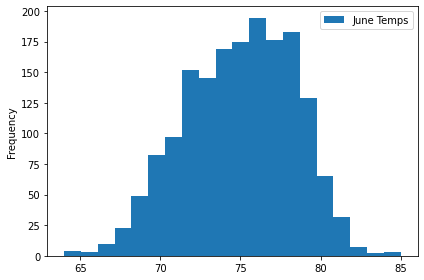

In [50]:
# plot June results for better visualization
june_df.plot.hist(bins=20)     # creat the histogram
plt.tight_layout()        # compress the x-axix label 

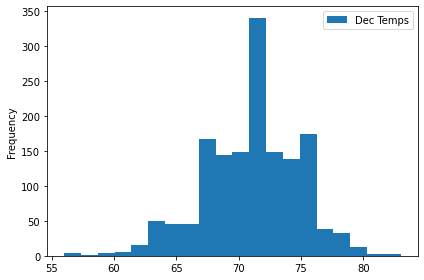

In [51]:
# plot DEC results for better visualization
dec_df.plot.hist(bins=20)     # creat the histogram
plt.tight_layout()        # compress the x-axix label 

In [20]:
# query that filters temps by station
june_station = session.query(Measurement.tobs, Measurement.station).filter(extract('month',Measurement.date)== 6)
print(june_station)

SELECT measurement.tobs AS measurement_tobs, measurement.station AS measurement_station 
FROM measurement 
WHERE CAST(STRFTIME('%m', measurement.date) AS INTEGER) = ?


In [21]:
# convert temps by station to list
june_station = session.query(Measurement.tobs, Measurement.station).filter(extract('month',Measurement.date)== 6).all()
print(june_station)

[(78.0, 'USC00519397'), (76.0, 'USC00519397'), (78.0, 'USC00519397'), (76.0, 'USC00519397'), (77.0, 'USC00519397'), (78.0, 'USC00519397'), (77.0, 'USC00519397'), (78.0, 'USC00519397'), (78.0, 'USC00519397'), (79.0, 'USC00519397'), (78.0, 'USC00519397'), (78.0, 'USC00519397'), (78.0, 'USC00519397'), (77.0, 'USC00519397'), (78.0, 'USC00519397'), (78.0, 'USC00519397'), (77.0, 'USC00519397'), (77.0, 'USC00519397'), (82.0, 'USC00519397'), (78.0, 'USC00519397'), (78.0, 'USC00519397'), (78.0, 'USC00519397'), (78.0, 'USC00519397'), (78.0, 'USC00519397'), (77.0, 'USC00519397'), (76.0, 'USC00519397'), (78.0, 'USC00519397'), (78.0, 'USC00519397'), (78.0, 'USC00519397'), (78.0, 'USC00519397'), (77.0, 'USC00519397'), (78.0, 'USC00519397'), (73.0, 'USC00519397'), (70.0, 'USC00519397'), (76.0, 'USC00519397'), (77.0, 'USC00519397'), (77.0, 'USC00519397'), (77.0, 'USC00519397'), (77.0, 'USC00519397'), (78.0, 'USC00519397'), (77.0, 'USC00519397'), (77.0, 'USC00519397'), (78.0, 'USC00519397'), (78.0, 'US

In [38]:
# convert to df
jun_station_temps_df = pd.DataFrame(june_station, columns=['June Temps', 'Station'])
jun_station_temps_df

,June Temps,Station
0,78.00,USC00519397
1,76.00,USC00519397
2,78.00,USC00519397
3,76.00,USC00519397
4,77.00,USC00519397
...,...,...
1695,79.00,USC00516128
1696,74.00,USC00516128
1697,74.00,USC00516128
1698,76.00,USC00516128


In [39]:
# show avg June temp for each station
pd.options.display.float_format = '{:.2f}'.format
jun_station_temps_df.groupby(['Station']).mean()

,June Temps
Station,
USC00511918,74.14
USC00513117,74.05
USC00514830,76.01
USC00516128,71.94
USC00517948,76.66
USC00518838,73.39
USC00519281,73.27
USC00519397,77.56
USC00519523,76.67


## additional reports for summary - december avg temp by station

In [41]:
# query that filters temps by station
dec_station = session.query(Measurement.tobs, Measurement.station).filter(extract('month',Measurement.date)== 12)
print(dec_station)

SELECT measurement.tobs AS measurement_tobs, measurement.station AS measurement_station 
FROM measurement 
WHERE CAST(STRFTIME('%m', measurement.date) AS INTEGER) = ?


In [42]:
# convert to list
dec_station = session.query(Measurement.tobs, Measurement.station).filter(extract('month',Measurement.date)== 12).all()
print(dec_station)

[(76.0, 'USC00519397'), (74.0, 'USC00519397'), (74.0, 'USC00519397'), (64.0, 'USC00519397'), (64.0, 'USC00519397'), (67.0, 'USC00519397'), (77.0, 'USC00519397'), (66.0, 'USC00519397'), (69.0, 'USC00519397'), (68.0, 'USC00519397'), (68.0, 'USC00519397'), (71.0, 'USC00519397'), (74.0, 'USC00519397'), (67.0, 'USC00519397'), (66.0, 'USC00519397'), (69.0, 'USC00519397'), (71.0, 'USC00519397'), (70.0, 'USC00519397'), (70.0, 'USC00519397'), (74.0, 'USC00519397'), (74.0, 'USC00519397'), (71.0, 'USC00519397'), (75.0, 'USC00519397'), (75.0, 'USC00519397'), (72.0, 'USC00519397'), (69.0, 'USC00519397'), (68.0, 'USC00519397'), (73.0, 'USC00519397'), (74.0, 'USC00519397'), (73.0, 'USC00519397'), (73.0, 'USC00519397'), (73.0, 'USC00519397'), (73.0, 'USC00519397'), (71.0, 'USC00519397'), (73.0, 'USC00519397'), (73.0, 'USC00519397'), (77.0, 'USC00519397'), (72.0, 'USC00519397'), (71.0, 'USC00519397'), (73.0, 'USC00519397'), (70.0, 'USC00519397'), (73.0, 'USC00519397'), (69.0, 'USC00519397'), (74.0, 'US

In [45]:
# convert to df
dec_station_temps_df = pd.DataFrame(dec_station, columns=['Dec Temps', 'Station'])
dec_station_temps_df

,Dec Temps,Station
0,76.00,USC00519397
1,74.00,USC00519397
2,74.00,USC00519397
3,64.00,USC00519397
4,64.00,USC00519397
...,...,...
1512,71.00,USC00516128
1513,71.00,USC00516128
1514,69.00,USC00516128
1515,65.00,USC00516128


In [46]:
# show avg Dec temp for each station
pd.options.display.float_format = '{:.2f}'.format
dec_station_temps_df.groupby(['Station']).mean()

,Dec Temps
Station,
USC00511918,69.68
USC00513117,71.07
USC00514830,73.22
USC00516128,69.29
USC00517948,71.83
USC00518838,72.42
USC00519281,69.90
USC00519397,71.11
USC00519523,72.43


## additional reports for summary - AVG June Prcp

In [71]:
# convert to list
jun_precip = session.query(Measurement.prcp, Measurement.station).filter(extract('month',Measurement.date)== 6).all()
print(jun_precip)


[(0.0, 'USC00519397'), (0.01, 'USC00519397'), (0.0, 'USC00519397'), (0.0, 'USC00519397'), (0.0, 'USC00519397'), (0.0, 'USC00519397'), (0.0, 'USC00519397'), (0.0, 'USC00519397'), (0.0, 'USC00519397'), (0.0, 'USC00519397'), (0.0, 'USC00519397'), (0.0, 'USC00519397'), (0.0, 'USC00519397'), (0.0, 'USC00519397'), (0.0, 'USC00519397'), (0.0, 'USC00519397'), (0.0, 'USC00519397'), (0.0, 'USC00519397'), (0.0, 'USC00519397'), (0.0, 'USC00519397'), (0.0, 'USC00519397'), (0.0, 'USC00519397'), (0.0, 'USC00519397'), (0.0, 'USC00519397'), (0.0, 'USC00519397'), (0.02, 'USC00519397'), (0.0, 'USC00519397'), (0.0, 'USC00519397'), (0.0, 'USC00519397'), (0.0, 'USC00519397'), (0.07, 'USC00519397'), (0.0, 'USC00519397'), (0.56, 'USC00519397'), (0.89, 'USC00519397'), (0.0, 'USC00519397'), (0.0, 'USC00519397'), (0.0, 'USC00519397'), (0.03, 'USC00519397'), (0.01, 'USC00519397'), (0.0, 'USC00519397'), (0.0, 'USC00519397'), (0.0, 'USC00519397'), (0.0, 'USC00519397'), (0.0, 'USC00519397'), (0.0, 'USC00519397'), (0

In [74]:
# convert to df
jun_prcp_df = pd.DataFrame(dec_precip, columns=['Jun Prcp', 'Station'])
jun_prcp_df

,Jun Prcp,Station
0,0.04,USC00519397
1,0.00,USC00519397
2,0.00,USC00519397
3,0.00,USC00519397
4,0.00,USC00519397
...,...,...
1512,0.14,USC00516128
1513,0.14,USC00516128
1514,1.03,USC00516128
1515,2.37,USC00516128


In [75]:
# show avg Jun precip for each station
pd.options.display.float_format = '{:.2f}'.format
jun_prcp_df.groupby(['Station']).mean()

,Jun Prcp
Station,
USC00511918,0.14
USC00513117,0.20
USC00514830,0.15
USC00516128,0.51
USC00517948,0.15
USC00518838,0.64
USC00519281,0.24
USC00519397,0.08
USC00519523,0.16


## additional reports for summary - AVG Dcember prcp

In [65]:
# convert to list
dec_precip = session.query(Measurement.prcp, Measurement.station).filter(extract('month',Measurement.date)== 12).all()
print(dec_precip)


[(0.04, 'USC00519397'), (0.0, 'USC00519397'), (0.0, 'USC00519397'), (0.0, 'USC00519397'), (0.0, 'USC00519397'), (0.0, 'USC00519397'), (0.0, 'USC00519397'), (1.58, 'USC00519397'), (0.77, 'USC00519397'), (0.0, 'USC00519397'), (0.0, 'USC00519397'), (0.0, 'USC00519397'), (0.0, 'USC00519397'), (0.0, 'USC00519397'), (0.0, 'USC00519397'), (0.0, 'USC00519397'), (1.4, 'USC00519397'), (0.0, 'USC00519397'), (0.0, 'USC00519397'), (None, 'USC00519397'), (0.13, 'USC00519397'), (0.55, 'USC00519397'), (0.06, 'USC00519397'), (0.01, 'USC00519397'), (0.0, 'USC00519397'), (0.03, 'USC00519397'), (0.08, 'USC00519397'), (0.0, 'USC00519397'), (0.0, 'USC00519397'), (0.0, 'USC00519397'), (0.0, 'USC00519397'), (0.0, 'USC00519397'), (0.0, 'USC00519397'), (0.13, 'USC00519397'), (0.07, 'USC00519397'), (0.07, 'USC00519397'), (0.08, 'USC00519397'), (0.4, 'USC00519397'), (0.7, 'USC00519397'), (0.0, 'USC00519397'), (0.01, 'USC00519397'), (0.07, 'USC00519397'), (0.02, 'USC00519397'), (0.15, 'USC00519397'), (0.02, 'USC00

In [68]:
# convert to df
dec_prcp_df = pd.DataFrame(dec_precip, columns=['Dec Prcp', 'Station'])
dec_prcp_df

,Dec Prcp,Station
0,0.04,USC00519397
1,0.00,USC00519397
2,0.00,USC00519397
3,0.00,USC00519397
4,0.00,USC00519397
...,...,...
1512,0.14,USC00516128
1513,0.14,USC00516128
1514,1.03,USC00516128
1515,2.37,USC00516128


In [69]:
# show avg Dec precip for each station
pd.options.display.float_format = '{:.2f}'.format
dec_prcp_df.groupby(['Station']).mean()

,Dec Prcp
Station,
USC00511918,0.14
USC00513117,0.20
USC00514830,0.15
USC00516128,0.51
USC00517948,0.15
USC00518838,0.64
USC00519281,0.24
USC00519397,0.08
USC00519523,0.16
